<a href="https://colab.research.google.com/github/Om2707/Cancer_Prediction_Using_Logistic_Regression/blob/main/Cancer_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving The_Cancer_data_1500_V2.csv to The_Cancer_data_1500_V2 (1).csv


In [10]:
import pandas as pd

# Read the CSV file
cancer_data = pd.read_csv('The_Cancer_data_1500_V2.csv')
cancer_data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


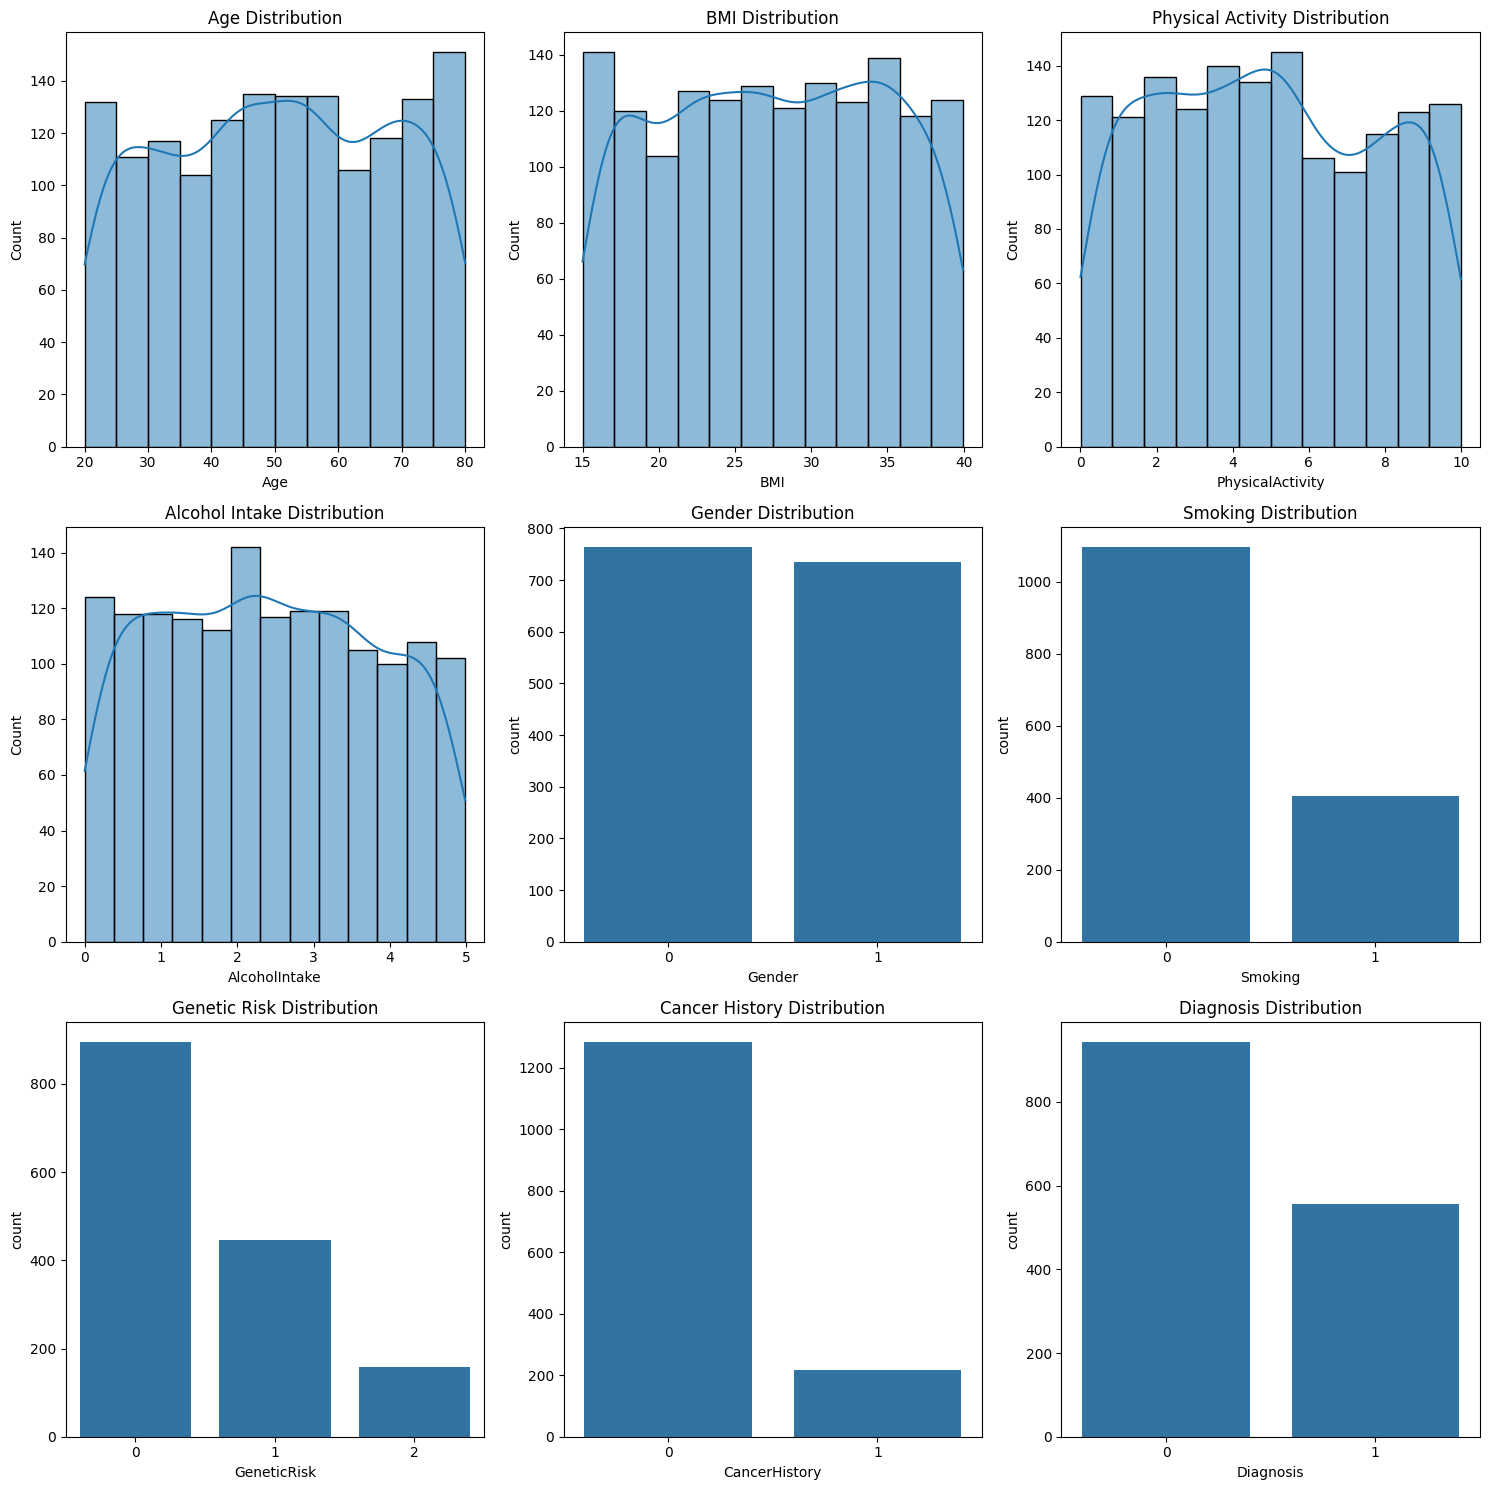

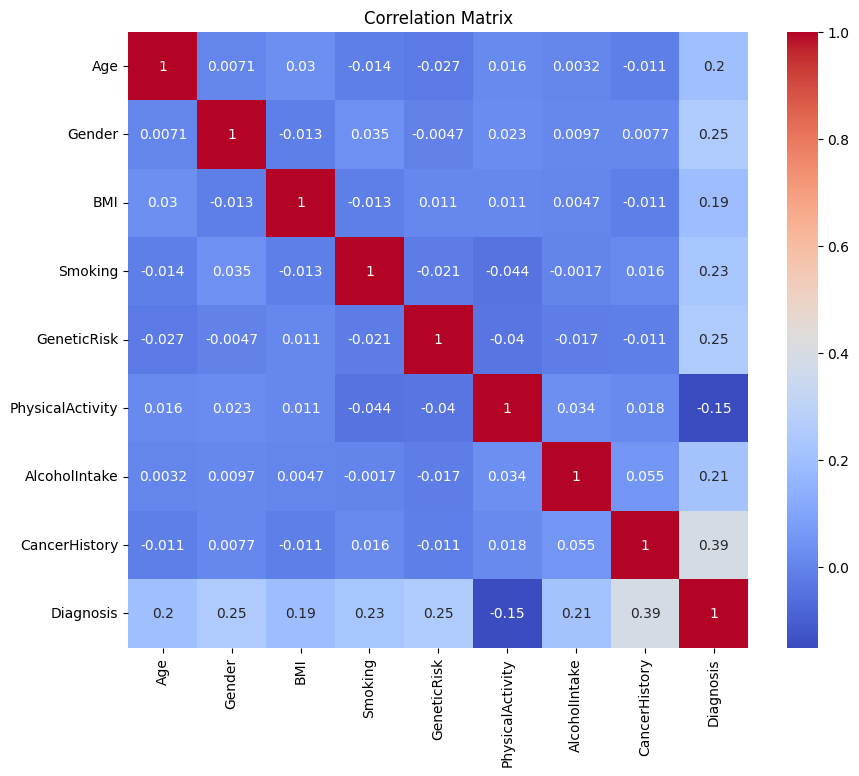

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = cancer_data.describe()
summary_stats

# Distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.histplot(cancer_data['Age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(cancer_data['BMI'], kde=True, ax=axes[0, 1]).set_title('BMI Distribution')
sns.histplot(cancer_data['PhysicalActivity'], kde=True, ax=axes[0, 2]).set_title('Physical Activity Distribution')
sns.histplot(cancer_data['AlcoholIntake'], kde=True, ax=axes[1, 0]).set_title('Alcohol Intake Distribution')

# Distribution of binary features
sns.countplot(x='Gender', data=cancer_data, ax=axes[1, 1]).set_title('Gender Distribution')
sns.countplot(x='Smoking', data=cancer_data, ax=axes[1, 2]).set_title('Smoking Distribution')
sns.countplot(x='GeneticRisk', data=cancer_data, ax=axes[2, 0]).set_title('Genetic Risk Distribution')
sns.countplot(x='CancerHistory', data=cancer_data, ax=axes[2, 1]).set_title('Cancer History Distribution')
sns.countplot(x='Diagnosis', data=cancer_data, ax=axes[2, 2]).set_title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = cancer_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and testing sets
X = cancer_data.drop('Diagnosis', axis=1)
y = cancer_data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Training a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.86
ROC-AUC Score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       184
           1       0.87      0.76      0.81       116

    accuracy                           0.86       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



In [14]:
def predict_cancer_probability(age, gender, bmi, smoking, genetic_risk, physical_activity, alcohol_intake, cancer_history):
    user_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'BMI': [bmi],
        'Smoking': [smoking],
        'GeneticRisk': [genetic_risk],
        'PhysicalActivity': [physical_activity],
        'AlcoholIntake': [alcohol_intake],
        'CancerHistory': [cancer_history]
    })

    user_data_scaled = scaler.transform(user_data)
    probability = model.predict_proba(user_data_scaled)[0][1]

    return probability

# Input Your Own Data
probability = predict_cancer_probability(70, 1, 25, 0, 1, 5, 2, 0)
print(f'The probability of cancer is: {probability * 100:.2f}%')


The probability of cancer is: 50.57%
